In [73]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime as dt
from sodapy import Socrata


In [74]:
client = Socrata("data.sfgov.org", None)
results = client.get("vw6y-z8j6", where='service_name="Encampments"', limit=250000)
raw_df = pd.DataFrame.from_records(results)
# raw_df.to_csv('data/311_encampments.csv')
print(raw_df.shape)

(214222, 20)


In [96]:
df = raw_df.copy()
df['Month'] = pd.to_datetime(df['requested_datetime']).apply(lambda t: t.date().replace(day=1))
df['Year'] = pd.to_datetime(df['requested_datetime']).apply(lambda t: t.date().replace(day=1, month=1))

In [152]:
df.head()

,address,agency_responsible,closed_date,lat,long,media_url,neighborhoods_sffind_boundaries,point,police_district,requested_datetime,...,service_request_id,service_subtype,source,status_description,status_notes,street,supervisor_district,updated_datetime,Month,Year
0,"154 10TH ST, SAN FRANCISCO, CA, 94103",HSOC Queue,NaN,37.774471666667,-122.415296666667,{'url': 'http://mobile311.sfgov.org/reports/11...,South of Market,"{'type': 'Point', 'coordinates': [-122.4152966...",SOUTHERN,2019-09-20T12:26:43.000,...,11442612,Encampment Reports,Mobile/Open311,Open,Open,10TH ST,6,2019-09-20T12:26:47.000,2019-09-01,2019-01-01
1,Intersection of 26TH ST and ORANGE ALY,HSOC Queue,NaN,37.748910575209,-122.419726085032,{'url': 'http://mobile311.sfgov.org/reports/11...,Mission,"{'type': 'Point', 'coordinates': [-122.4197260...",MISSION,2019-09-20T14:02:37.000,...,11443314,Encampment Reports,Mobile/Open311,Open,Open,26TH ST,9,2019-09-20T14:02:40.000,2019-09-01,2019-01-01
2,"274 CAPP ST, SAN FRANCISCO, CA, 94110",Duplicate Case Hold Queue,NaN,37.762333333333,-122.418555,{'url': 'http://mobile311.sfgov.org/reports/11...,Mission,"{'type': 'Point', 'coordinates': [-122.418555,...",MISSION,2019-09-20T20:19:00.000,...,11444971,Encampment Reports,Mobile/Open311,Open,Open,CAPP ST,9,2019-09-20T20:19:12.000,2019-09-01,2019-01-01
3,"1414 17TH ST, SAN FRANCISCO, CA, 94107",HSOC Queue,NaN,37.765122,-122.397856,{'url': 'http://mobile311.sfgov.org/reports/11...,Potrero Hill,"{'type': 'Point', 'coordinates': [-122.397856,...",SOUTHERN,2019-09-20T12:44:54.000,...,11442751,Encampment Reports,Mobile/Open311,Open,Open,17TH ST,10,2019-09-20T18:21:06.000,2019-09-01,2019-01-01
4,Intersection of CEDAR ST and VAN NESS AVE,HSOC Queue,NaN,37.786167144775,-122.421371459961,NaN,Lower Nob Hill,"{'type': 'Point', 'coordinates': [-122.4213714...",NORTHERN,2019-09-20T09:11:00.000,...,11441411,Encampment Reports,Phone,Open,Open,CEDAR ST,6,2019-09-20T09:13:21.000,2019-09-01,2019-01-01


In [155]:
df.groupby('source').count()[['service_request_id']]

,service_request_id
source,
Integrated Agency,349
Mobile/Open311,142068
Other Department,36
Phone,51675
Twitter,915
Web,19179


In [172]:
idx = df.index[df['source']=='Phone']
df_nabe = pd.pivot_table(df.loc[idx],
                         values='service_request_id',
                         columns='Month',
                         index='neighborhoods_sffind_boundaries',
                         aggfunc='count'
                        ).fillna(0)

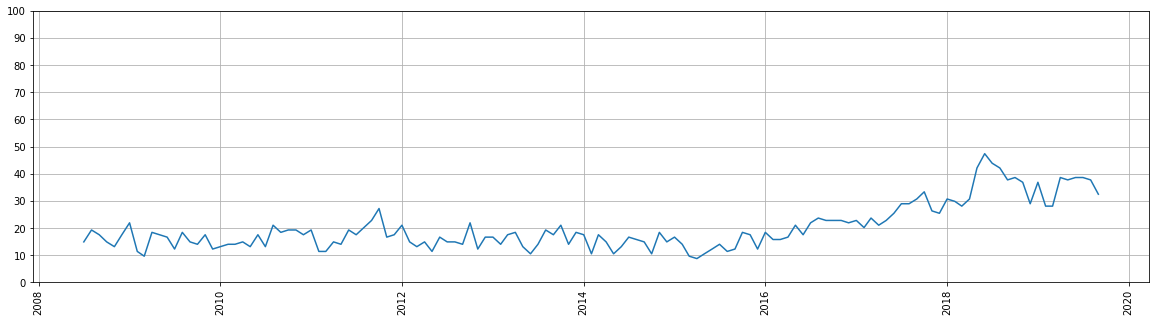

In [177]:
plt.figure(figsize=(20,5))
plt.plot(((df_nabe > 3)*100).sum() / df_nabe.shape[0])
plt.grid()
plt.xticks(rotation=90)
plt.yticks(np.arange(0,101,10))
plt.ylim(0,100)
plt.show()

In [169]:
df_nabe.to_clipboard()

In [166]:
df_nabe.sum(axis=1).sort_values().head()

neighborhoods_sffind_boundaries
Balboa Terrace              1.0
Treasure Island             1.0
Lincoln Park / Ft. Miley    2.0
Sherwood Forest             2.0
Parkmerced                  5.0
dtype: float64

In [167]:
((df_nabe.iloc[:,:36] > 3)*1).sum(axis=1).sort_values().tail(20)

neighborhoods_sffind_boundaries
Polk Gulch         14
Cayuga             15
Bayview            15
Castro             15
Portola            16
Outer Richmond     18
Cathedral Hill     19
Bernal Heights     19
Lower Haight       19
Excelsior          20
Inner Richmond     21
Outer Sunset       24
Lower Nob Hill     25
Civic Center       25
Mission Terrace    26
Tenderloin         26
Duboce Triangle    28
Mission Dolores    35
South of Market    36
Mission            36
dtype: int64

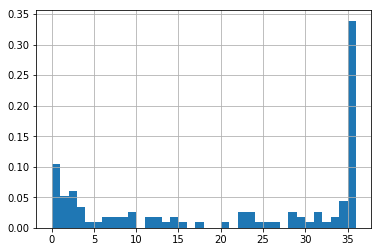

In [147]:
((df_nabe.iloc[:,-36:] > 3)*1).sum(axis=1).sort_values().hist(cumulative=False, density=True ,bins=np.arange(37))

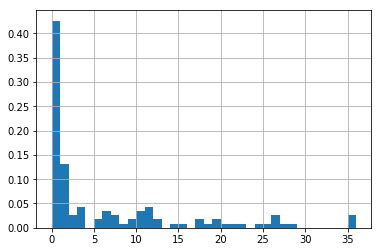

In [148]:
((df_nabe.iloc[:,:36] > 3)*1).sum(axis=1).sort_values().hist(cumulative=False, density=True ,bins=np.arange(37))

In [151]:
df_nabe.to_clipboard()